# FIFA Audience

## Data Importation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data Set

In [2]:
fifa = pd.read_csv('../data/fifa_countries_audience.csv')
fifa.head()

country confederation  population_share  tv_audience_share  \
0  United States      CONCACAF               4.5                4.3   
1          Japan           AFC               1.9                4.9   
2          China           AFC              19.5               14.8   
3        Germany          UEFA               1.2                2.9   
4         Brazil      CONMEBOL               2.8                7.1   

   gdp_weighted_share  
0                11.3  
1                 9.1  
2                 7.3  
3                 6.3  
4                 5.4

# Data Information

In [3]:
fifa.describe()

population_share  tv_audience_share  gdp_weighted_share
count        191.000000         191.000000          191.000000
mean           0.522513           0.523037            0.520419
std            1.960335           1.449535            1.457594
min            0.000000           0.000000            0.000000
25%            0.000000           0.000000            0.000000
50%            0.100000           0.100000            0.000000
75%            0.350000           0.300000            0.300000
max           19.500000          14.800000           11.300000

# Plots

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


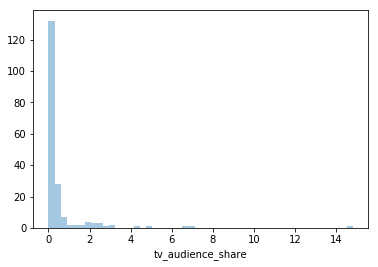

In [5]:
sns.distplot(fifa['tv_audience_share'], kde = False)

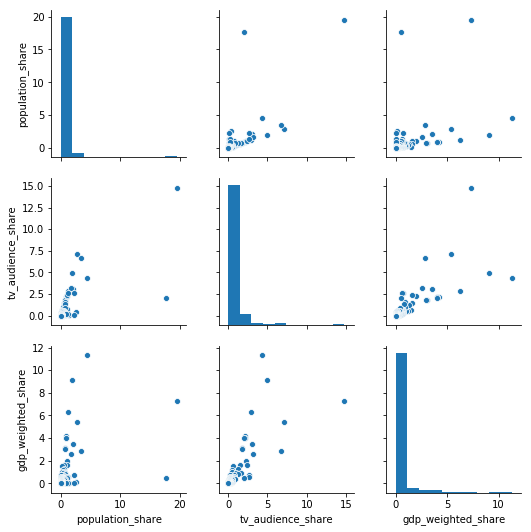

In [6]:
sns.pairplot(fifa)

# Correlation

In [7]:
fifa.corr()

population_share  tv_audience_share  gdp_weighted_share
population_share            1.000000           0.731324            0.447268
tv_audience_share           0.731324           1.000000            0.770779
gdp_weighted_share          0.447268           0.770779            1.000000

# Linear Regression

In [8]:
x = fifa[['tv_audience_share']]
y = fifa[['gdp_weighted_share']]
x.head()

tv_audience_share
0                4.3
1                4.9
2               14.8
3                2.9
4                7.1

In [9]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [10]:
lm.coef_

array([[0.77506441]])

In [11]:
lm.intercept_

array([0.11503176])

In [12]:
lm.score(x,y)

0.5940999640380655

# Fit the Linear Regression

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Predict values

In [14]:
SpainGDP = 3.1
testgdp_weighted_share =pd.DataFrame({'gdp_weighted_share':[SpainGDP]})

predictions= lm.predict(testgdp_weighted_share)

predictions

array([[2.51773142]])

In [15]:
predictedtv_audience_share=predictions[0][0]
predictedtv_audience_share

2.5177314167098133

In [16]:
predictedtv_audience_share = round(predictedtv_audience_share,2)
print("Spain´s GDP weighted share:" + str(SpainGDP))
print("Predicted TV audience share:" + str(predictedtv_audience_share) + "%")
predictedtv_audience_share

Spain´s GDP weighted share:3.1
Predicted TV audience share:2.52%


2.52

# Sampling Data

In [17]:
from sklearn.model_selection import train_test_split
gdpTrain, gdpTest, tvTrain, tvTest = train_test_split(fifa[['gdp_weighted_share']],
                                                     fifa[['tv_audience_share']],
                                                      test_size = 0.3, random_state = 1)
len(gdpTrain)

133

In [18]:
lm = LinearRegression()
lm.fit(gdpTrain,tvTrain)
predictions = lm.predict(gdpTest)

predictions

array([[0.55316   ],
       [0.20024851],
       [0.12966622],
       [0.12966622],
       [0.20024851],
       [0.12966622],
       [0.4825777 ],
       [0.12966622],
       [0.12966622],
       [0.12966622],
       [0.12966622],
       [1.18840066],
       [0.20024851],
       [0.12966622],
       [0.12966622],
       [0.20024851],
       [0.12966622],
       [0.4825777 ],
       [3.94111022],
       [0.34141311],
       [0.34141311],
       [0.12966622],
       [0.12966622],
       [0.12966622],
       [0.55316   ],
       [0.34141311],
       [2.17655281],
       [0.12966622],
       [0.12966622],
       [0.27083081],
       [1.25898296],
       [0.12966622],
       [0.12966622],
       [0.83548918],
       [0.20024851],
       [0.12966622],
       [0.12966622],
       [0.20024851],
       [0.27083081],
       [0.12966622],
       [0.55316   ],
       [0.12966622],
       [0.12966622],
       [0.27083081],
       [0.12966622],
       [0.4119954 ],
       [1.04723607],
       [3.094

In [19]:
results = pd.DataFrame(list(zip(tvTest,predictions)), columns =['Actual','Predictions'])
results

Actual          Predictions
0  tv_audience_share  [0.553159995598542]

In [20]:
from sklearn import metrics
print('Mean Absolute Error(MAE):', metrics.mean_absolute_error(tvTest, predictions))
print('Mean Squared Error(MSE):', metrics.mean_squared_error(tvTest,predictions))
print('Root Mean Square(RMSE):', np.sqrt(metrics.mean_squared_error(tvTest,predictions)))

Mean Absolute Error(MAE): 0.33381322057928403
Mean Squared Error(MSE): 0.6650875353728642
Root Mean Square(RMSE): 0.8155289911296006


# Visualize Prediction

Text(0.5, 0, 'Predicted TV audience share')

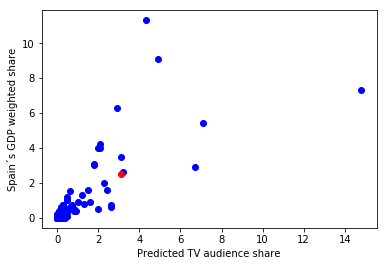

In [21]:
plt.scatter(x,y,color = "Blue")
plt.scatter(SpainGDP,predictedtv_audience_share, color = "Red")
plt.ylabel("Spain´s GDP weighted share")
plt.xlabel("Predicted TV audience share")

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


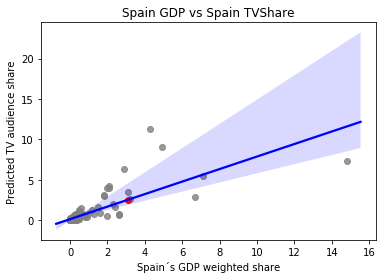

In [22]:
plotfifa = sns.regplot (x = "tv_audience_share",
                          y = "gdp_weighted_share",
                          data = fifa,
                          scatter_kws ={"color":"gray"},
                          line_kws={"color":"blue"});
plotfifa.set_title("Spain GDP vs Spain TVShare")
plotfifa.set(xlabel="Spain´s GDP weighted share", ylabel = "Predicted TV audience share")
plotfifa.scatter(SpainGDP,predictedtv_audience_share, color = "Red")
plotfifa

# Data Preparation

In [23]:
fifa['Impact'] = 'Unknown'
fifa.head()

country confederation  population_share  tv_audience_share  \
0  United States      CONCACAF               4.5                4.3   
1          Japan           AFC               1.9                4.9   
2          China           AFC              19.5               14.8   
3        Germany          UEFA               1.2                2.9   
4         Brazil      CONMEBOL               2.8                7.1   

   gdp_weighted_share   Impact  
0                11.3  Unknown  
1                 9.1  Unknown  
2                 7.3  Unknown  
3                 6.3  Unknown  
4                 5.4  Unknown

In [29]:
fifa.loc[fifa["tv_audience_share"]<= 0.5, "Impact"] = "None/Low"
fifa.loc[(fifa["tv_audience_share"]> 0.5) & (fifa["tv_audience_share"]<= 5), "Impact"] = "Mid"
fifa.loc[fifa["tv_audience_share"]> 5, "Impact"]= "High"
fifa.head()

country confederation  population_share  tv_audience_share  \
0  United States      CONCACAF               4.5                4.3   
1          Japan           AFC               1.9                4.9   
2          China           AFC              19.5               14.8   
3        Germany          UEFA               1.2                2.9   
4         Brazil      CONMEBOL               2.8                7.1   

   gdp_weighted_share Impact  
0                11.3    Mid  
1                 9.1    Mid  
2                 7.3   High  
3                 6.3    Mid  
4                 5.4   High

In [56]:
magnitudes = fifa[["population_share","gdp_weighted_share"]].values
popularity = fifa[["tv_audience_share"]].values

In [59]:
trainMagnitudes, trainPopularity, testMagnitudes, testPopularity = train_test_split(magnitudes,popularity,test_size=0.3, random_state =1)

# Building Decision Tree

In [61]:
tree = DecisionTreeClassifier()

model = tree.fit(trainMagnitudes,trainPopularity)

PredictedPopularity = model.predict(tv_audience_share)

ValueError: Unknown label type: 'continuous-multioutput'